In [1]:
import numpy as np
from importlib import reload
import ptracer as pt
%matplotlib notebook
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%load_ext snakeviz

In [56]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [67]:
w = 15e-6
z = 600e-6
xs = np.linspace(-w, w, 15)
ms = []
for x in tqdm(xs):
    pos = np.array([x, 0, z])
    m = pt.SmoothMeshTO(pos, "six_normals.obj", 5e-6, n_in=1.52)
    rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 300, 532, pos+[0,0,-5.1e-6], 5e-6)
    s = pt.Scene(rf, [m])
    s.run(limit=2)
    ms.append(s.momentum)
ms = np.array(ms)

In [68]:
ms2 = []
for x in xs:
    pos = np.array([x, 0, z])
    m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
    rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 1000, 532, pos+[0,0,-5.1e-6], 5e-6)
    s = pt.Scene(rf, [m2])
    s.run(limit=5)
    ms2.append(s.momentum)
ms2 = np.array(ms2)

<IPython.core.display.Javascript object>


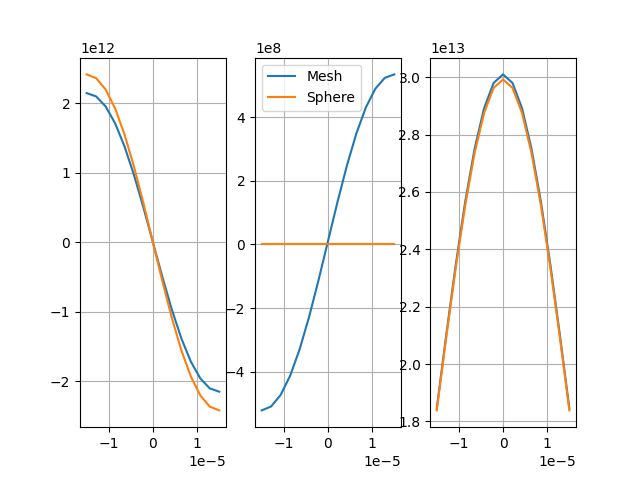

In [69]:
fig, ax = plt.subplots(1,3)
for i in range(3):
    ax[i].plot(xs, ms[:,i], label="Mesh")
    ax[i].plot(xs, ms2[:,i], label="Sphere")
    ax[i].grid()
ax[1].legend()
# ax.plot(xs, ms[:,2])

# Back to basics

In [71]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [72]:
# %%snakeviz
# pos = np.array([0, 0, 200e-6])
# m = pt.MeshTO(pos, "six.obj", 5e-6, n_in=1.52)
# rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 1000, 532, pos+[0,0,-5.1e-6], 5e-6)

m = pt.MeshTO([0,0,0], "symmetric.obj", 5e-6, n_in=1.52, reflective=True)
d = np.sqrt(2)/2
# rf = pt.BasicRF(0,[-d,d],-2,[0,0,1])
rf = pt.HexagonalGaussianRF([0,0,-2e-6], [0,0,1], 5e-6, 1, 7, 1, [0,0,-8e-6], 5e-6)
s = pt.Scene(rf, [m])
# s.propagate(1e-6)
s.run(limit=5)
s.propagate(1e-6)
# print(s.momentum)

<IPython.core.display.Javascript object>


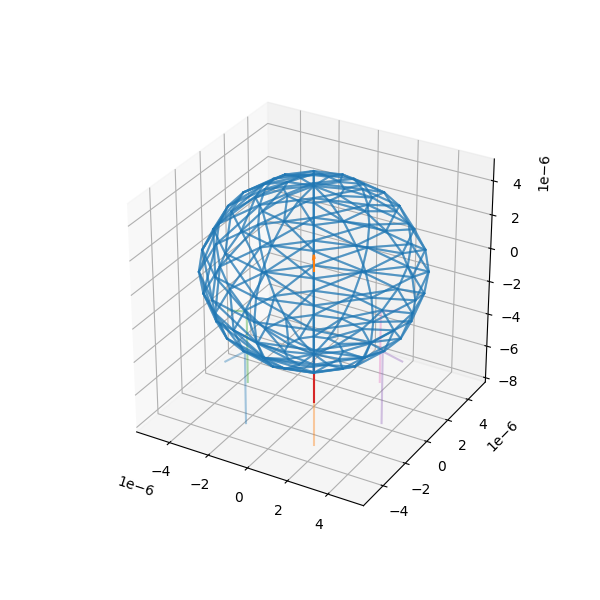

In [73]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, m_quiver=True, m_quiver_kwargs={"zorder":10, "color": "tab:orange"})

In [217]:
from numba import jit

# @jit(nopython=True)
def app(n=1000):
    l = []
    for i in range(n):
        l.append(i)
    return l

@jit(nopython=True)
def stt(n=1000):
    l = [None]*1000
    for i in range(n):
        l[i] = i
    return l

def npp(n=1000):
    l = np.zeros(n).tolist()
    for i in range(n):
        l[i] = i
    return l

In [218]:
%timeit app()
# %timeit stt()
%timeit npp()

62.3 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
57.7 µs ± 982 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
